In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

### Overall cases and deaths

In [2]:
cases = pd.read_csv("data/COVID-19/MDCOVID19_CasesByCounty.csv", header=0)

In [3]:
cols = ['Allegany', 'Anne_Arundel', 'Baltimore', 'Baltimore_City',
       'Calvert', 'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester',
       'Frederick', 'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery',
       'Prince_Georges', 'Queen_Annes', 'Somerset', 'St_Marys', 'Talbot',
       'Washington', 'Wicomico', 'Worcester', 'Unknown']

In [4]:
cases["total"] = np.sum(cases[cols], axis=1)

In [72]:
# death = pd.read_csv("data/COVID-19/MDCOVID19_ConfirmedDeathsByCounty.csv", header=0)
# death["total"] = np.sum(death[cols], axis=1)
# df = cases[["DATE", "total"]].merge(death[["DATE", "total"]], on="DATE", how="left").rename(columns={"total_x": "cases", "total_y": "deaths"})

In [14]:
df = cases[["DATE", "total"]].set_index("DATE").merge(cases[["DATE", "total"]].set_index("DATE").diff(), left_index=True, right_index=True).rename(columns={"total_x": "total", "total_y": "daily"}).reset_index()

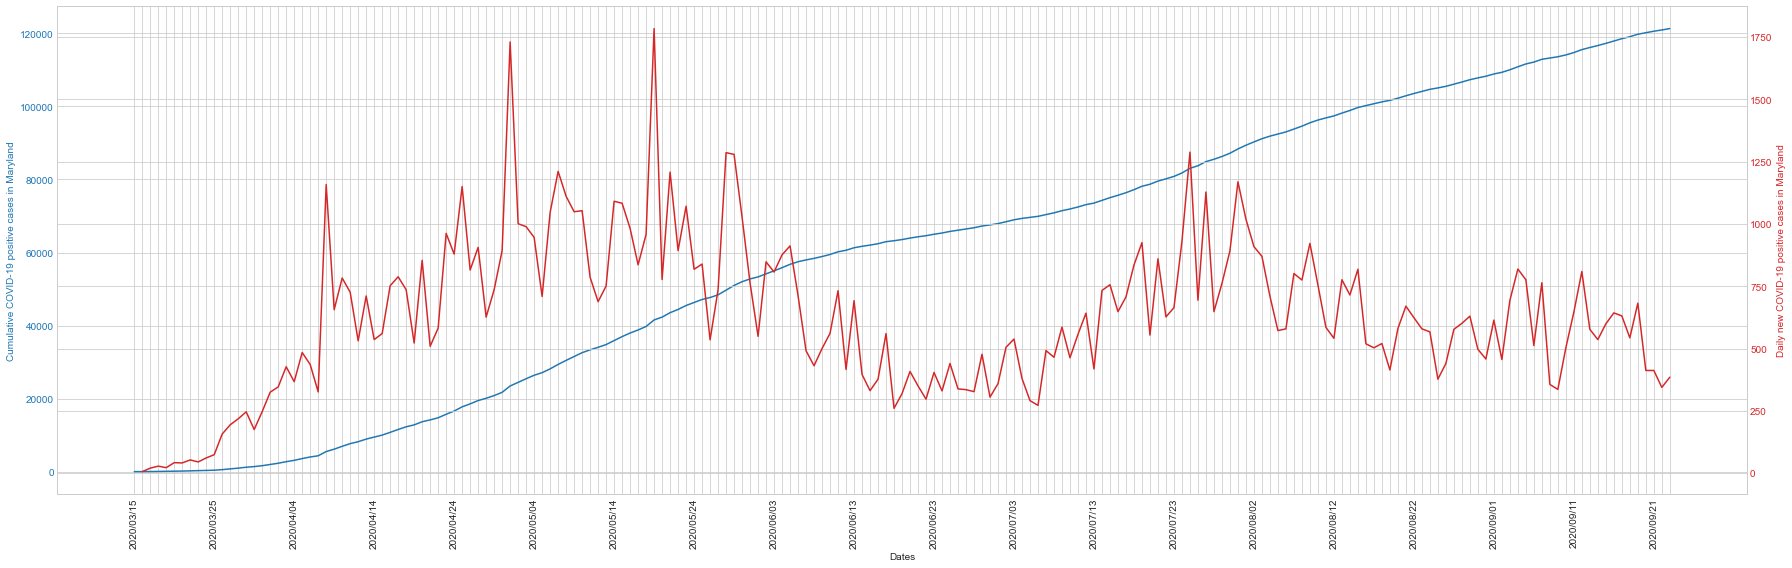

In [15]:
fig, ax1 = plt.subplots(figsize=(25, 8))

color = "tab:blue"
ax1.plot(df["DATE"], df["total"], color=color)
ax1.set_ylabel("Cumulative COVID-19 positive cases in Maryland", color=color)

ax1.set_xlabel("Dates")
ax1.tick_params(axis="y", labelcolor=color)
plt.xticks(rotation=90)
# every 10th label is kept
for ind, label in enumerate(ax1.get_xticklabels()):
    if ind % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax2 = ax1.twinx()
color="tab:red"
ax2.plot(df["DATE"], df["daily"], color=color)

ax2.set_ylabel("Daily new COVID-19 positive cases in Maryland", color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.show()


fig.savefig("figs/COVID-19/cases_and_new_cases.png", dpi=220)

### County ranks

In [93]:
cases = pd.read_csv("data/COVID-19/MDCOVID19_CasesByCounty.csv", header=0)

In [95]:
cases = cases.transpose().reset_index()
cases.columns = cases.iloc[0]
cases = cases.drop(cases.index[0])
cases = cases.rename(columns={"DATE": "county"})

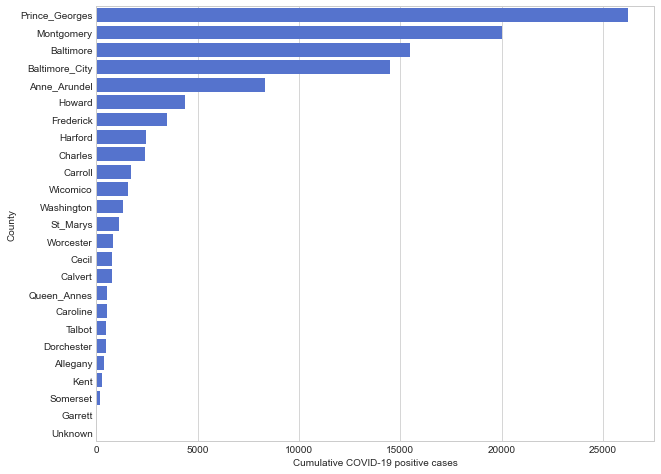

In [103]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=cases[["county", "2020/08/31"]].sort_values(by="2020/08/31", ascending=False),
           x="2020/08/31", y="county", color="royalblue")

plt.xlabel("Cumulative COVID-19 positive cases")
plt.ylabel("County")

plt.show()

fig.savefig("figs/COVID-19/cases_by_county.png", dpi=220)

### By age

In [125]:
age = pd.read_csv("data/COVID-19/MDCOVID19_CasesByAgeDistribution.csv", header=0)

In [126]:
df = age[age["DATE"] <= "2020/08/31"]

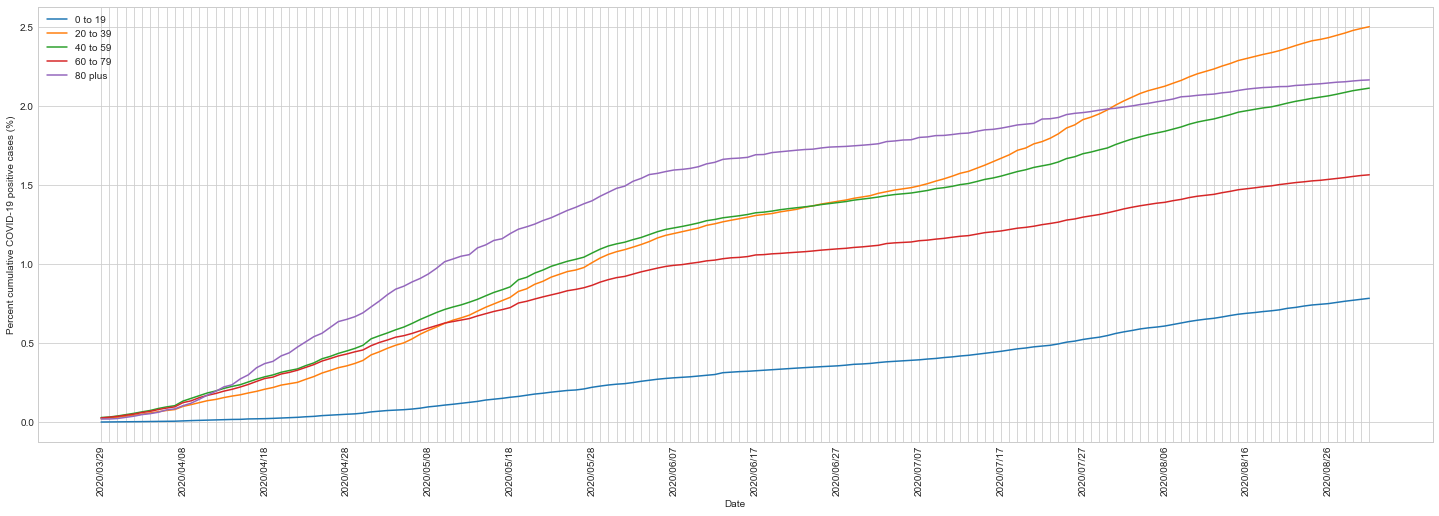

In [128]:
fig, ax = plt.subplots(figsize=(25, 8))

ax.plot(df["DATE"], (df["Age_0_to_9"]+df["Age_10_to_19"])/(358346+359505+390637+381318)*100, label="0 to 19")
ax.plot(df["DATE"], (df["Age_20_to_29"]+df["Age_30_to_39"])/(372016+820575+786924/2)*100, label="20 to 39")
ax.plot(df["DATE"], (df["Age_40_to_49"]+df["Age_50_to_59"])/(786924/2+795954+413230)*100, label="40 to 59")
ax.plot(df["DATE"], (df["Age_60_to_69"]+df["Age_70_to_79"])/(407288+564533+281807/2)*100, label="60 to 79")
ax.plot(df["DATE"], df["Age_80plus"]/(281807/2+113547)*100, label="80 plus")

# every 10th label is kept
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Percent cumulative COVID-19 positive cases (%)")

plt.legend()
plt.show()

fig.savefig("figs/COVID-19/cases_by_age.png", dpi=220)

### By race

In [113]:
race = pd.read_csv("data/COVID-19/MDCOVID19_CasesByRaceAndEthnicityDistribution.csv", header=0)

In [118]:
df = race[race["DATE"] <= "2020/08/31"].dropna()

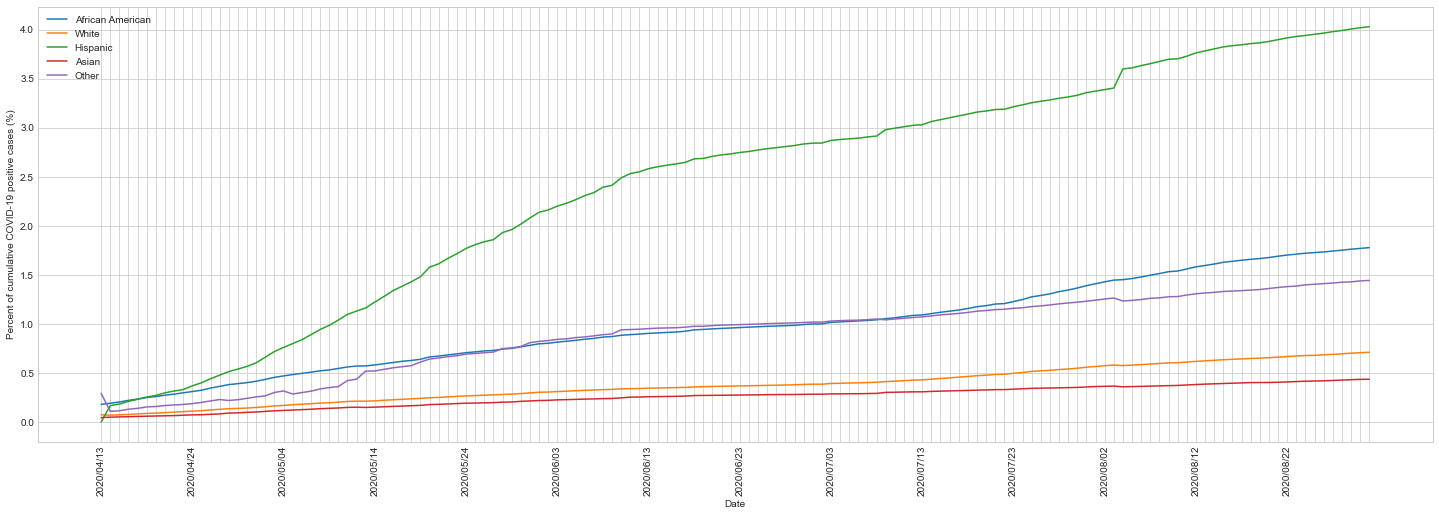

In [123]:
fig, ax = plt.subplots(figsize=(25, 8))

ax.plot(df["DATE"], df["African_American"]/1946932*100, label="African American")
ax.plot(df["DATE"], df["White"]/3467098*100, label="White")
ax.plot(df["DATE"], df["Hispanic"]/643171*100, label="Hispanic")
ax.plot(df["DATE"], df["Asian"]/463258*100, label="Asian")
ax.plot(df["DATE"], df["Other"]/328213*100, label="Other")

# every 10th label is kept
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Percent of cumulative COVID-19 positive cases (%)")

plt.legend()
plt.show()

fig.savefig("figs/COVID-19/cases_by_race_and_ethnicity.png", dpi=220)